KNN classification on breast_cancer data

In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns

In [2]:
#importing dataset using pandas
dataset = pd.read_csv('./Data/breast_cancer.csv')
dataset.shape
dataset.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
print(dataset.columns)

Index(['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')


In [4]:
#independet data 
X = dataset.iloc[:, 1:-1].values
#dependent data 
y = dataset.iloc[:, -1].values
# print(X)
# print(y)

In [5]:
#splitting of dataset in train and test data 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 , random_state = 0)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=5).fit(x_train,y_train)

In [7]:
y_pred=KNN.predict(x_test)
test_list=[y_pred,y_test]
# for x,y in zip(*test_list):
#     print(x,y)

In [8]:
score = KNN.score(x_test,y_test)
print(100*score)

97.08029197080292


In [9]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[84,  3],
       [ 1, 49]], dtype=int64)

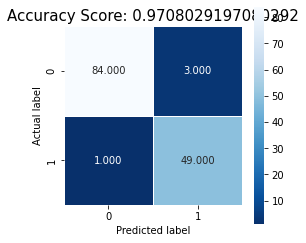

In [10]:
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);